<a href="https://colab.research.google.com/github/GubioGL/Feixes_pacialmente_coerentes/blob/main/Codigo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
#! pip install LightPipes

In [85]:
# Importando as bibliotecas
from LightPipes import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [86]:
# Definindo os campo e constante da Eq.32
def Lambda(M,N,sigma,delta):
  a = 1/(4*sigma**2) #
  b = 1/(2*delta**2) #
  c = 2*np.sqrt( a**2 + 2*a*b )
  L = ( np.pi/(a + b + c/2) )*( (a + b - c/2)/( a + b + c/2 ) )**( abs(M)/2 + N )
  return L

def Laguerre_G(n,m,sigma,delta):
    a = 1/(4*sigma**2) # [L]^-2
    b = 1/(2*delta**2) # [L]^-2
    c = 2*np.sqrt( a**2 + 2*a*b )
    w = np.sqrt( 2/c )

    x = np.arange(-N/2, N/2,1)*dx
    xx,yy = np.meshgrid(x,x)

    r    = np.sqrt(xx**2+yy**2)
    C    = np.sqrt(2*math.factorial(jj)/(np.pi*math.factorial(n+abs(m))))
    PL   = sp.special.assoc_laguerre(2*r**2/w**2,n,abs(m))
    Fase = np.exp(- 1j*m*np.arctan2(yy,xx) )

    LG   = C*1/w*(r*np.sqrt(2)/w)**abs(m)*PL*np.exp(-r**2/w**2)*Fase
    return LG

In [87]:
#Parâmetros do feixe GSM
sigma = .3*mm        # largura do feixe
delta = sigma/5      # comprimento de coerência
L = 10
P = 10

lambd = 620*nm        # light wavelength
N     = 2**7          # Dimensão
dx    = 20*um         # Tamanho do pixel


# Gerando os campos para a soma incoerente
Numero_de_Soma_Inc = 0
for j in range(-L,L+1):
    for jj in range(P+1):
        cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
        if (cutoff >= 0.015):
            Numero_de_Soma_Inc +=1

In [89]:

# Gerando os campos para a soma incoerente

Campo =  np.exp( 1j*np.zeros((N,N,Numero_de_Soma_Inc))) # Campo

i = 0
for j in range(-L,L+1):
  for jj in range(P+1):
    cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
    if (cutoff >= 0.015):
      Campo[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*Laguerre_G(n=jj,m=j,sigma=sigma,delta=delta)
      i += 1


In [90]:
x = np.arange(-N/2, N/2,1)*dx
xx,yy = np.meshgrid(x,x)
ref = [0,0]
index = np.where((xx==ref[0])*(yy==ref[1])==True)

mu = np.zeros_like(Campo[:,:,1])
intMap = np.sum(abs(Campo)**2,2)

for ii in range(0,N):
    for jj in range(0,N):
      mu[ii,jj] = np.sum(np.conj(Campo[ii,jj,:])*Campo[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu)
img = img/img.max()

Expressão teorica retirada do artigo equaçao (46)

In [91]:
x = np.arange(-N/2, N/2,1)*dx
teorico = np.exp(-x**2/(2*delta**2) )

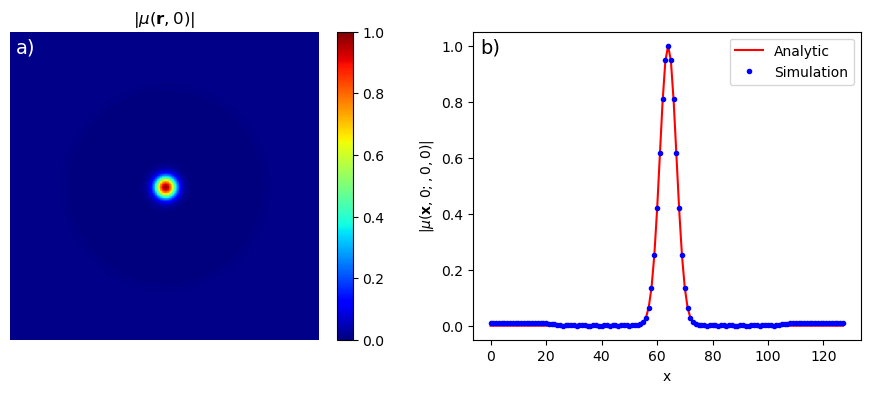

In [92]:
# Criar uma figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Primeiro subplot: imagem completa sem eixos
ax1.imshow(img, cmap="jet")
ax1.set_title(r'$|\mu(\mathbf{r},0)|$')
ax1.axis('off')  # Desligar os eixos
fig.colorbar(plt.cm.ScalarMappable(cmap="jet"), ax=ax1)  # Adicionar colorbar ao lado do plot
ax1.text(0.02, 0.98, 'a)', color='white', va='top', 
         ha='left', transform=ax1.transAxes, fontsize=14, )

# Segundo subplot: linha central da imagem
ax2.plot(teorico,"r",label="Analytic")

ax2.plot(img[N//2, :],"b.",label="Simulation")  # Altere a cor conforme necessário
ax2.set_xlabel('x')  # Rótulo para o eixo x
ax2.set_ylabel(r'$|\mu(\mathbf{x},0;,0,0)|$')  # Rótulo para o eixo y
ax2.text(0.02, 0.98, 'b)', color='black', va='top', ha='left', transform=ax2.transAxes, fontsize=14)

plt.legend()
# Salvar a figura com alta resolução
plt.savefig('doc_q_02_dmc.png', dpi=1000)

# Mostrar o plot
plt.show()